Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


Text(0, 0.5, 'Price in $10,000s')

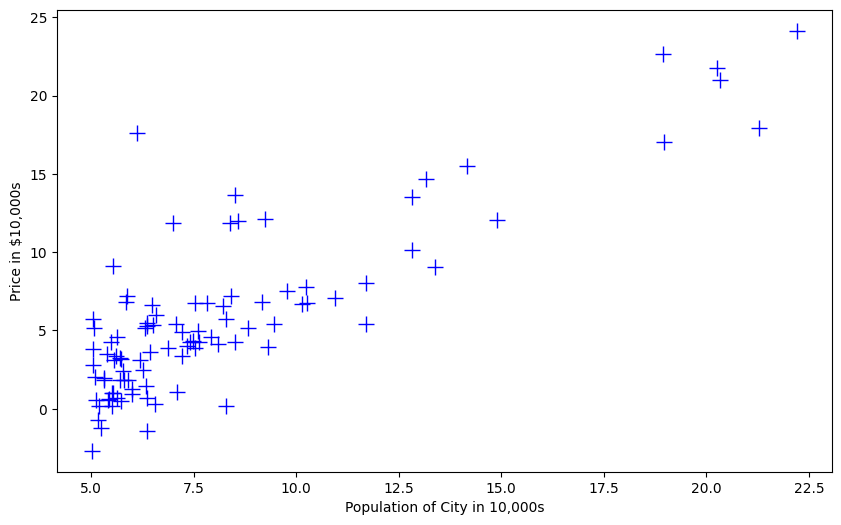

In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab Notebooks/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

In [ ]:
def cost_function(X, y, w):
    """
    Parameters:

    X : numpy array of shape (m,), Input features.
    y : numpy array of shape (m,), Target values.
    w : list or tuple of length 2, Parameters [w0, w1].

    Returns:

    cost : float, The value of the cost function.
    """
    m = len(X)
    w0, w1 = w
    cost = (1 / (2 * m)) * np.sum((y - (w0 + w1 * X)) ** 2)
    return cost

In [ ]:
def mini_batch_GD(X, y, w, alpha, num_iters, batch_size):
  """
  Performs gradient descent to learn weights using mini-batches

  Parameters:

    X: The feature matrix.
    y: The target variable vector.
    w: The initial model parameters.
    alpha: The learning rate.
    num_iters: The number of iterations (epochs) to run.
    batch_size: The size of each mini-batch.

  Returns:

    w: The learned model parameters.
    J_history: The cost history over iterations.
  """
  m = y.size  #definition of m
  J_history = []

  for i in range(num_iters):
    # Create a list of mini-batch indices
    batch_indices = np.array_split(np.random.permutation(m), m // batch_size + 1)

    for batch_index in batch_indices:
      X_batch = X[batch_index]
      y_batch = y[batch_index]

      # Calculate gradient, update w
      predictions = X_batch.dot(w)
      errors = predictions - y_batch
      gradient = (1/batch_size) * X_batch.T.dot(errors)
      w = w - alpha * gradient

    # bookkeeping
    J_history.append(cost_function(X, y, w))

  return w, J_history

objective function found by gradient descent using batch size of 1 : 59.95445459724306


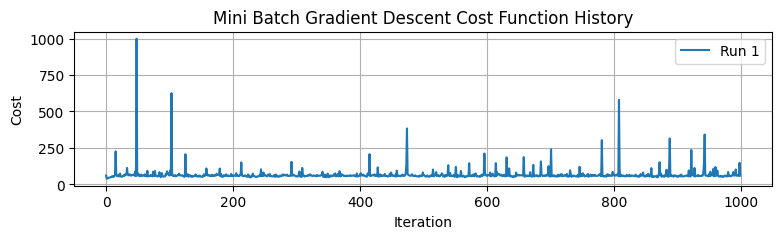

objective function found by gradient descent using batch size of 5 : 59.22191483495762


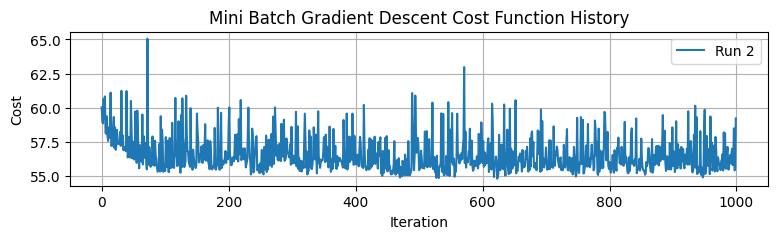

objective function found by gradient descent using batch size of 10 : 55.827520293248504


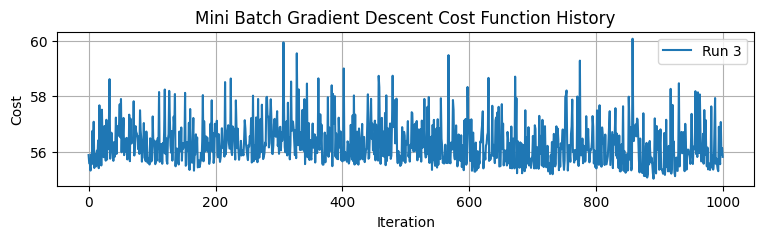

objective function found by gradient descent using batch size of 20 : 56.0244810873044


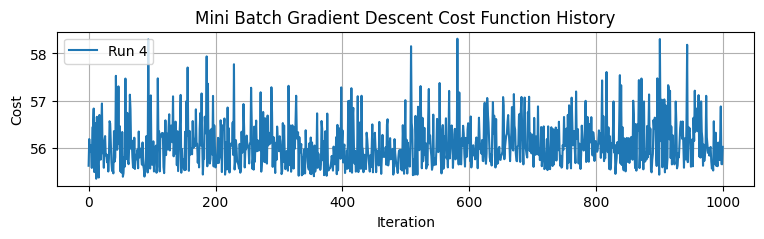

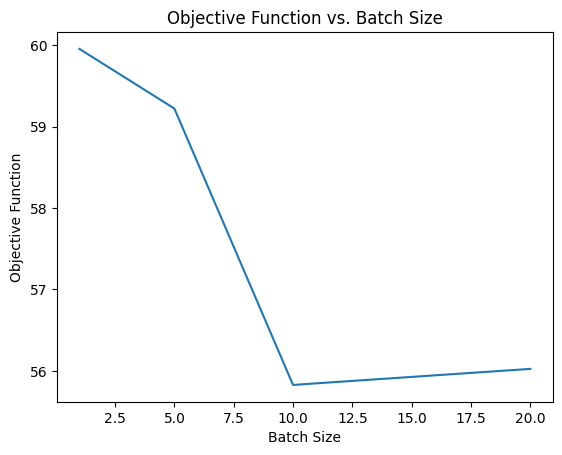

In [ ]:
import matplotlib.pyplot as plt
# Initialize parameters
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations
batch_size = [1,5,10,20]
w = np.zeros((2, 1))  # Initial model parameters
objective_functions =  []

# Run gradient descent
for i in range(len(batch_size)):
  w, J_history = mini_batch_GD(X, y, w, alpha, num_iters, batch_size[i])
  objective_functions.append(J_history[-1])
  print('objective function found by gradient descent using batch size of', batch_size[i], ":", J_history[-1])
  plt.figure(figsize=(9, 2))
  plt.plot(J_history, label=f'Run {i+1}')
  plt.xlabel('Iteration')
  plt.ylabel('Cost')
  plt.title('Mini Batch Gradient Descent Cost Function History')
  plt.legend()
  plt.grid(True)
  plt.show()

plt.plot(batch_size, objective_functions)
plt.xlabel('Batch Size')
plt.ylabel('Objective Function')
plt.title('Objective Function vs. Batch Size')
plt.show()



In [ ]:
# at x = 16 (corresponding to house in a city with population of 160,000)
x_new = np.array([[1, 16.0]])

y_pred = x_new.dot(w)

price = y_pred[0,0]*10000
print("$", "{:.2f}".format(price))

$ 153237.19


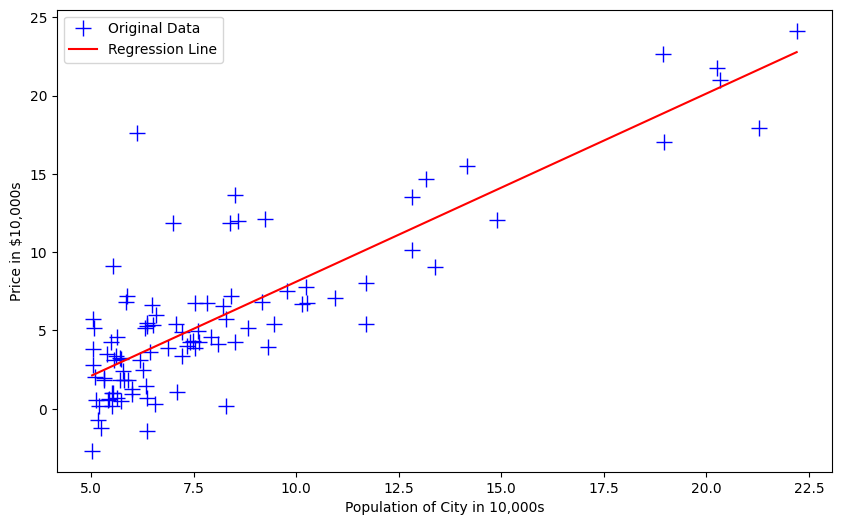

In [ ]:
#plotting
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y[:, 0], 'b+', markersize=12, label='Original Data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x_values_with_ones = np.insert(x_values.reshape(-1, 1), 0, 1, axis=1)
y_values_predicted = x_values_with_ones.dot(w)

plt.plot(x_values, y_values_predicted, 'r-', label='Regression Line')
plt.legend()
plt.show()